## Imoprting all the necessary libraries

In [89]:
#imoprting all the libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

## Importing dataset

In [90]:
dataset = pd.read_csv('/Users/klsharma22/Desktop/TensorflowCertifcationCourse/boston.csv')
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Preprocessing the dataset

In [91]:
dataset.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
dtype: float64

In [92]:
dataset.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64

In [93]:
dataset.mode()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01501,0.0,18.1,0.0,0.538,5.713,100.0,3.4952,24.0,666.0,20.2,396.9,6.36,50.0
1,14.33370,NaN,NaN,NaN,NaN,6.127,NaN,NaN,NaN,NaN,NaN,NaN,7.79,NaN
2,NaN,NaN,NaN,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,8.05,NaN
3,NaN,NaN,NaN,NaN,NaN,6.229,NaN,NaN,NaN,NaN,NaN,NaN,14.10,NaN
4,NaN,NaN,NaN,NaN,NaN,6.405,NaN,NaN,NaN,NaN,NaN,NaN,18.13,NaN
5,NaN,NaN,NaN,NaN,NaN,6.417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
dataset.isna().value_counts()

CRIM   ZN     INDUS  CHAS   NOX    RM     AGE    DIS    RAD    TAX    PTRATIO  B      LSTAT  MEDV 
False  False  False  False  False  False  False  False  False  False  False    False  False  False    506
Name: count, dtype: int64

In [95]:
ct = make_column_transformer((MinMaxScaler(), [e for e in dataset.columns if e != 'MEDV']))

## Splitting the data into training and testing set

In [96]:
X = dataset.drop("MEDV", axis= 1)
y = dataset['MEDV']

In [97]:
X.shape, y.shape

((506, 13), (506,))

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [99]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## Building models
1. 1 layer without normalisation
2. 1 layer with normalisation
3. 2 layer with normalisation

In [100]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss= tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics= ['mae'])

history_1 = model_1.fit(X_train, y_train, epochs= 100)

Epoch 1/100


13/13 [==============================] - 0s 705us/step - loss: 1440.9421 - mae: 1440.9421
Epoch 2/100
13/13 [==============================] - 0s 497us/step - loss: 1510.0615 - mae: 1510.0615
Epoch 3/100
13/13 [==============================] - 0s 441us/step - loss: 1432.8363 - mae: 1432.8363
Epoch 4/100
13/13 [==============================] - 0s 410us/step - loss: 1521.6910 - mae: 1521.6910
Epoch 5/100
13/13 [==============================] - 0s 419us/step - loss: 1432.1158 - mae: 1432.1158
Epoch 6/100
13/13 [==============================] - 0s 409us/step - loss: 1501.9817 - mae: 1501.9817
Epoch 7/100
13/13 [==============================] - 0s 407us/step - loss: 1469.4279 - mae: 1469.4279
Epoch 8/100
13/13 [==============================] - 0s 410us/step - loss: 1530.6163 - mae: 1530.6163
Epoch 9/100
13/13 [==============================] - 0s 432us/step - loss: 1450.4004 - mae: 1450.4004
Epoch 10/100
13/13 [==============================] - 0s 371us/step - loss: 1527.9771 - mae: 1

In [101]:
model_1.evaluate(X_test, y_test)

4/4 [==============================] - 0s 655us/step - loss: 1392.3715 - mae: 1392.3715


[1392.3714599609375, 1392.3714599609375]

In [102]:
model_1.predict(X_test)

4/4 [==============================] - 0s 549us/step


array([[-1230.0663],
       [-1191.4166],
       [-1883.0187],
       [-1234.9725],
       [-1792.0571],
       [-1353.141 ],
       [-1245.5267],
       [-1459.9888],
       [-1807.692 ],
       [-1387.7739],
       [-1216.6874],
       [-1252.8997],
       [-1227.3818],
       [-1377.3524],
       [-1212.1404],
       [-1766.6482],
       [-1056.6141],
       [-1778.5718],
       [-1209.6749],
       [-1814.402 ],
       [-1133.1553],
       [-1194.7563],
       [-1194.5996],
       [-1195.2744],
       [-1664.998 ],
       [-1729.4105],
       [-1392.8782],
       [-1064.2343],
       [-1208.6588],
       [-1387.2572],
       [-1238.0151],
       [-1218.9021],
       [-1807.3684],
       [-1777.7137],
       [-1692.5135],
       [-1153.6069],
       [-1138.8688],
       [-1122.8168],
       [-1182.7483],
       [-1210.3867],
       [-1393.8384],
       [-1138.8589],
       [-1166.9514],
       [-1320.2749],
       [-1183.4541],
       [-1809.5049],
       [-1188.1366],
       [-1222

In [103]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

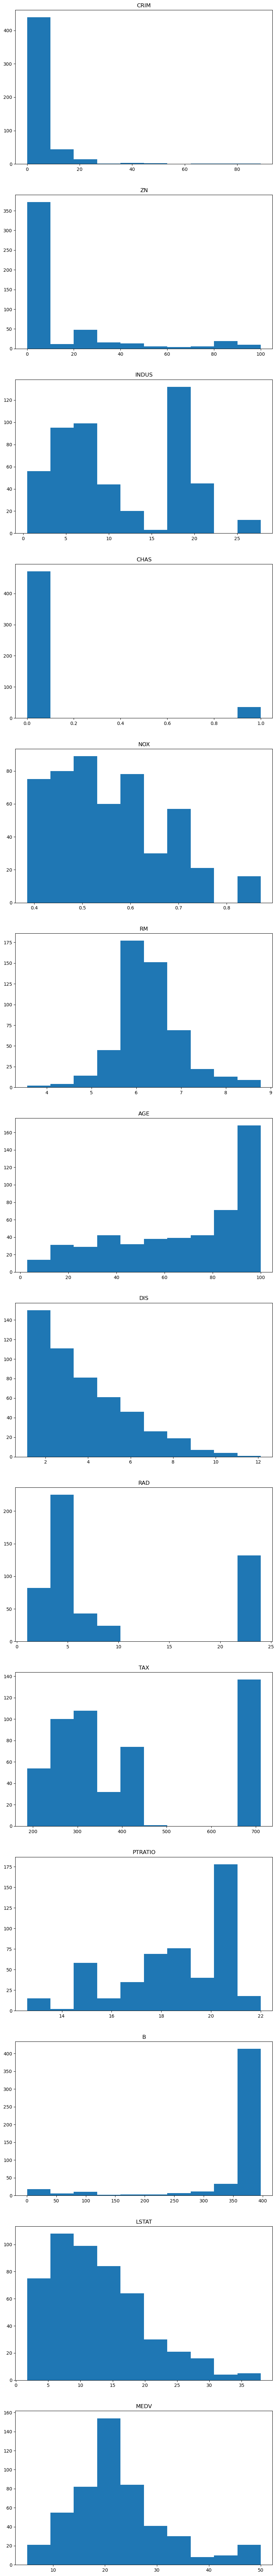

In [104]:
fig, ax = plt.subplots(nrows= len(dataset.columns), ncols= 1, figsize= (10, 100))

for i, name in enumerate(dataset.columns):
    ax[i].hist(dataset[name])
    ax[i].set_title(name)

In [105]:
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [106]:
X_train_normal.shape, X_test_normal.shape

((404, 13), (102, 13))

In [107]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_2.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['mae'])

history_2 = model_2.fit(X_train_normal, y_train, epochs= 100)

Epoch 1/100
13/13 [==============================] - 0s 620us/step - loss: 22.8162 - mae: 22.8162
Epoch 2/100
13/13 [==============================] - 0s 446us/step - loss: 22.3457 - mae: 22.3457
Epoch 3/100
13/13 [==============================] - 0s 407us/step - loss: 21.8747 - mae: 21.8747
Epoch 4/100
13/13 [==============================] - 0s 389us/step - loss: 21.4037 - mae: 21.4037
Epoch 5/100
13/13 [==============================] - 0s 406us/step - loss: 20.9331 - mae: 20.9331
Epoch 6/100
13/13 [==============================] - 0s 427us/step - loss: 20.4621 - mae: 20.4621
Epoch 7/100
13/13 [==============================] - 0s 401us/step - loss: 19.9917 - mae: 19.9917
Epoch 8/100
13/13 [==============================] - 0s 369us/step - loss: 19.5206 - mae: 19.5206
Epoch 9/100
13/13 [==============================] - 0s 361us/step - loss: 19.0497 - mae: 19.0497
Epoch 10/100
13/13 [==============================] - 0s 373us/step - loss: 18.5840 - mae: 18.5840
Epoch 11/100
13/13 

In [108]:
model_2.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 703us/step - loss: 6.4343 - mae: 6.4343


[6.434347152709961, 6.434347152709961]

In [109]:
model_2.predict(X_test_normal)

4/4 [==============================] - 0s 876us/step


array([[19.523912],
       [19.413437],
       [22.886036],
       [18.470144],
       [23.048424],
       [20.349255],
       [20.58068 ],
       [22.566269],
       [22.748314],
       [20.7252  ],
       [20.427517],
       [20.285593],
       [17.436785],
       [20.126486],
       [20.35118 ],
       [22.317501],
       [21.337914],
       [22.063295],
       [19.53474 ],
       [23.34182 ],
       [18.62386 ],
       [19.163063],
       [21.162334],
       [21.083649],
       [21.7984  ],
       [21.706007],
       [19.316187],
       [17.607634],
       [20.904305],
       [20.376583],
       [19.155117],
       [20.162247],
       [23.675758],
       [22.426262],
       [21.845047],
       [18.663624],
       [20.165787],
       [19.843277],
       [19.834213],
       [18.368858],
       [20.247215],
       [20.357147],
       [19.850002],
       [19.380396],
       [19.231686],
       [22.78212 ],
       [20.978706],
       [18.592688],
       [22.69172 ],
       [19.099535],


In [110]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [111]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ['mae'])

history_3 = model_3.fit(X_train_normal, y_train, epochs= 100)

Epoch 1/100
13/13 [==============================] - 0s 597us/step - loss: 22.1957 - mae: 22.1957
Epoch 2/100
13/13 [==============================] - 0s 483us/step - loss: 20.9180 - mae: 20.9180
Epoch 3/100
13/13 [==============================] - 0s 445us/step - loss: 19.2300 - mae: 19.2300
Epoch 4/100
13/13 [==============================] - 0s 442us/step - loss: 16.8075 - mae: 16.8075
Epoch 5/100
13/13 [==============================] - 0s 440us/step - loss: 13.6629 - mae: 13.6629
Epoch 6/100
13/13 [==============================] - 0s 490us/step - loss: 10.7311 - mae: 10.7311
Epoch 7/100
13/13 [==============================] - 0s 446us/step - loss: 8.8850 - mae: 8.8850
Epoch 8/100
13/13 [==============================] - 0s 357us/step - loss: 8.0602 - mae: 8.0602
Epoch 9/100
13/13 [==============================] - 0s 350us/step - loss: 7.6968 - mae: 7.6968
Epoch 10/100
13/13 [==============================] - 0s 346us/step - loss: 7.4197 - mae: 7.4197
Epoch 11/100
13/13 [=======

In [112]:
model_3.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 751us/step - loss: 3.0618 - mae: 3.0618


[3.0617825984954834, 3.0617825984954834]

In [113]:
model_3.predict(X_test_normal)

4/4 [==============================] - 0s 916us/step


array([[24.683767  ],
       [31.916191  ],
       [16.445826  ],
       [23.773657  ],
       [17.802397  ],
       [21.43474   ],
       [18.144464  ],
       [15.490009  ],
       [19.596706  ],
       [19.352453  ],
       [22.902662  ],
       [20.826918  ],
       [-2.1158352 ],
       [21.500298  ],
       [18.661272  ],
       [22.949184  ],
       [18.956905  ],
       [ 7.3430853 ],
       [37.06688   ],
       [17.060726  ],
       [25.279211  ],
       [27.126225  ],
       [13.205817  ],
       [22.473269  ],
       [15.911317  ],
       [13.637443  ],
       [21.630993  ],
       [12.186241  ],
       [21.29125   ],
       [18.53142   ],
       [19.375797  ],
       [23.592936  ],
       [23.278725  ],
       [15.915924  ],
       [14.73197   ],
       [17.671556  ],
       [28.840975  ],
       [20.080187  ],
       [22.831     ],
       [23.662155  ],
       [14.62716   ],
       [27.238665  ],
       [38.328243  ],
       [18.924774  ],
       [24.09408   ],
       [15

In [114]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64

In [117]:
history_1.history

{'loss': [1440.942138671875,
  1510.0615234375,
  1432.8363037109375,
  1521.6910400390625,
  1432.1158447265625,
  1501.981689453125,
  1469.4278564453125,
  1530.6163330078125,
  1450.400390625,
  1527.97705078125,
  1414.607421875,
  1458.7490234375,
  1449.9676513671875,
  1505.466064453125,
  1451.8277587890625,
  1523.0269775390625,
  1464.914306640625,
  1492.2413330078125,
  1407.8421630859375,
  1495.0869140625,
  1440.789306640625,
  1499.7264404296875,
  1484.05419921875,
  1476.9532470703125,
  1446.207763671875,
  1457.0283203125,
  1455.8060302734375,
  1446.0277099609375,
  1468.413330078125,
  1432.2159423828125,
  1530.8455810546875,
  1418.8907470703125,
  1519.805419921875,
  1396.627685546875,
  1515.7796630859375,
  1349.3072509765625,
  1457.132080078125,
  1491.757080078125,
  1464.0272216796875,
  1487.860107421875,
  1488.1312255859375,
  1481.34375,
  1461.3275146484375,
  1524.4263916015625,
  1474.953857421875,
  1488.119140625,
  1490.025634765625,
  1449.5

{'loss': [1440.942138671875, 1510.0615234375, 1432.8363037109375, 1521.6910400390625, 1432.1158447265625, 1501.981689453125, 1469.4278564453125, 1530.6163330078125, 1450.400390625, 1527.97705078125, 1414.607421875, 1458.7490234375, 1449.9676513671875, 1505.466064453125, 1451.8277587890625, 1523.0269775390625, 1464.914306640625, 1492.2413330078125, 1407.8421630859375, 1495.0869140625, 1440.789306640625, 1499.7264404296875, 1484.05419921875, 1476.9532470703125, 1446.207763671875, 1457.0283203125, 1455.8060302734375, 1446.0277099609375, 1468.413330078125, 1432.2159423828125, 1530.8455810546875, 1418.8907470703125, 1519.805419921875, 1396.627685546875, 1515.7796630859375, 1349.3072509765625, 1457.132080078125, 1491.757080078125, 1464.0272216796875, 1487.860107421875, 1488.1312255859375, 1481.34375, 1461.3275146484375, 1524.4263916015625, 1474.953857421875, 1488.119140625, 1490.025634765625, 1449.5133056640625, 1499.52734375, 1452.2822265625, 1474.849609375, 1412.638916015625, 1473.41430664

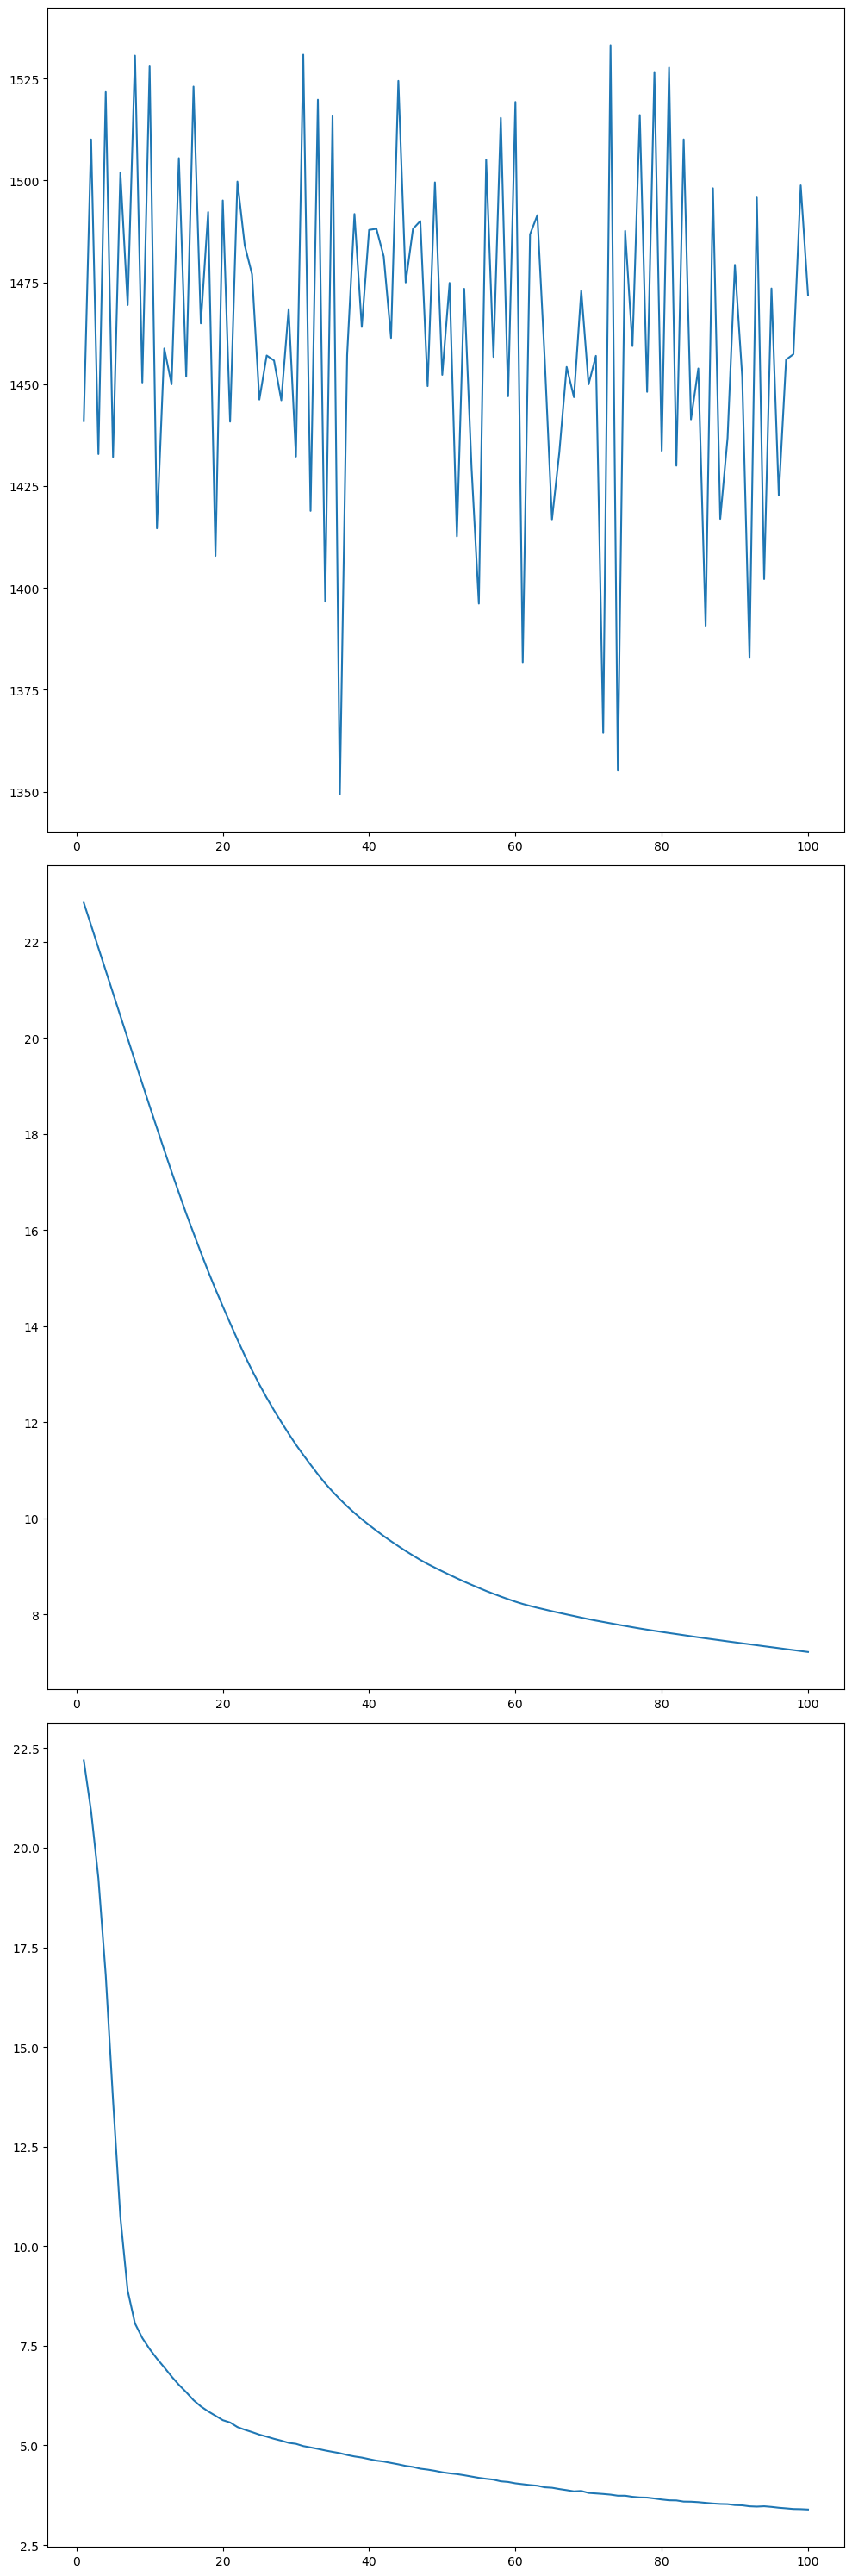

In [119]:
fig_1, ax_1 = plt.subplots(nrows= 3, ncols= 1, figsize= (10, 30))

for i, history in enumerate([history_1, history_2, history_3]):
    ax_1[i].plot(range(1, 101), history.history['loss'])
    print(history.history)

plt.tight_layout()

In [121]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                140       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
